# Notebook for Experimentation and Testing

## Purpose

This notebook was created to follow the instructions from Homework 1, Step 3:
```
Step 3: Set Up Your Playground Notebook

Inside your personal folder, create a Jupyter notebook named playground.ipynb. This notebook will be your dedicated space for experimentation and testing.
```

## Contents

The notebook will retrieve and display data (Homework 1) and perform the first steps of model development (Homework 2).

In [1]:
!pip install google-cloud-storage

In [11]:
# Step 0: Import various necessary libraries
from google.cloud import storage
import os
from PIL import Image
import io
import matplotlib.pyplot as plt

In [12]:
# Step 1: Authenticate to Google Cloud
from google.colab import auth
auth.authenticate_user()

In [13]:
# Step 2: Initialize the Storage Client and Access the Dataset Bucket
client = storage.Client()
bucket_name = 'unprocessed_image_dataset'
bucket = client.get_bucket(bucket_name)

# List of sub-folders (pose categories)
pose_categories = ['arms_crossed', 'hand_on_hip', 'hand_out', 'hands_down', 'hands_on_head', 'hands_on_hips', 'hands_out', 'hands_up']

In [14]:
# Helper function to get basic details about each sub-folder
def get_folder_details(pose_category):
    blobs = bucket.list_blobs(prefix=f'{pose_category}/')

    num_files = 0
    total_size = 0

    # Iterate through files in the folder
    for blob in blobs:
        if blob.name.endswith('/'):  # Skip directories
            continue
        num_files += 1
        total_size += blob.size

    return num_files, total_size

In [15]:
# Helper function to display sample images from a folder
def display_sample_images(pose_category, num_samples=5):
    blobs = bucket.list_blobs(prefix=f'{pose_category}/')
    images = []

    for i, blob in enumerate(blobs):
        if blob.name.endswith('/') or i >= num_samples:
            continue

        # Download the image data
        image_data = blob.download_as_bytes()

        # Open the image using PIL
        img = Image.open(io.BytesIO(image_data))
        images.append(img)

    # Display the images
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

In [16]:
# Helper function to analyze the dataset by iterating through each sub-folder
def analyze_dataset():
    for pose_category in pose_categories:
        # Get details about the folder
        num_files, total_size = get_folder_details(pose_category)

        # Convert total size to MB for readability
        total_size_mb = total_size / (1024 * 1024)

        # Display folder details
        print(f"Folder: {pose_category}")
        print(f"  Number of images: {num_files}")
        print(f"  Total size: {total_size_mb:.2f} MB")

        # Display sample images
        print(f"Sample images from '{pose_category}':")
        display_sample_images(pose_category)
        print("\n" + "-"*50 + "\n")

Folder: arms_crossed
  Number of images: 38
  Total size: 56.35 MB
Sample images from 'arms_crossed':


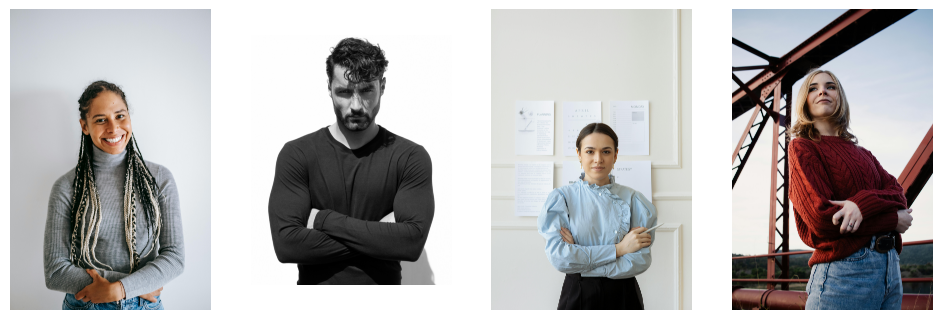


--------------------------------------------------

Folder: hand_on_hip
  Number of images: 22
  Total size: 33.37 MB
Sample images from 'hand_on_hip':


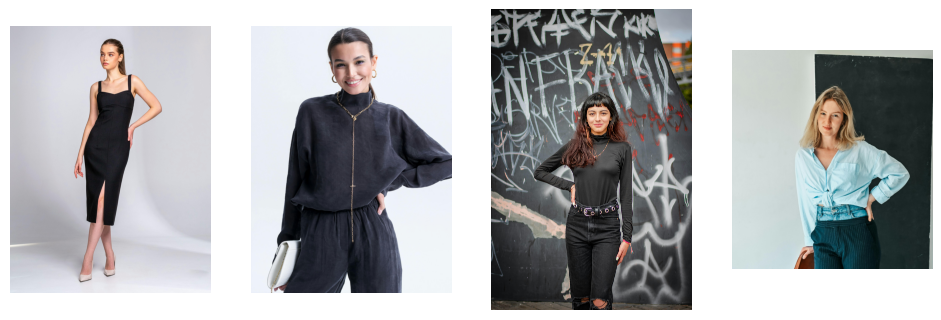


--------------------------------------------------

Folder: hand_out
  Number of images: 14
  Total size: 21.51 MB
Sample images from 'hand_out':


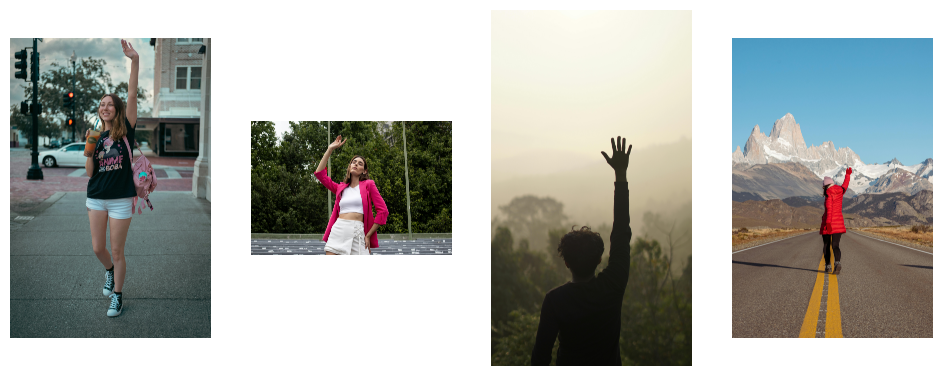


--------------------------------------------------

Folder: hands_down
  Number of images: 29
  Total size: 44.13 MB
Sample images from 'hands_down':


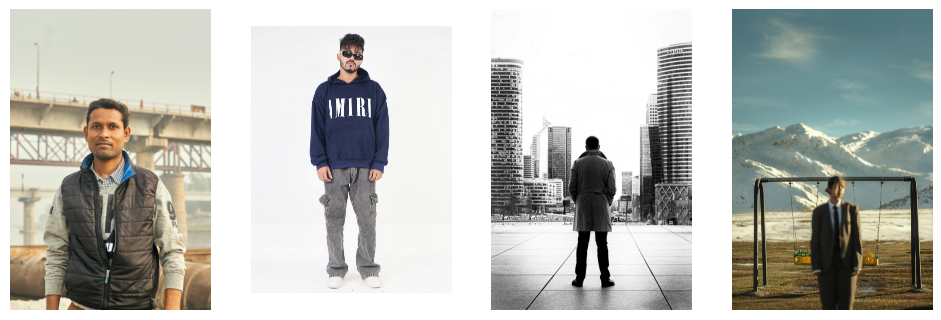


--------------------------------------------------

Folder: hands_on_head
  Number of images: 26
  Total size: 40.07 MB
Sample images from 'hands_on_head':


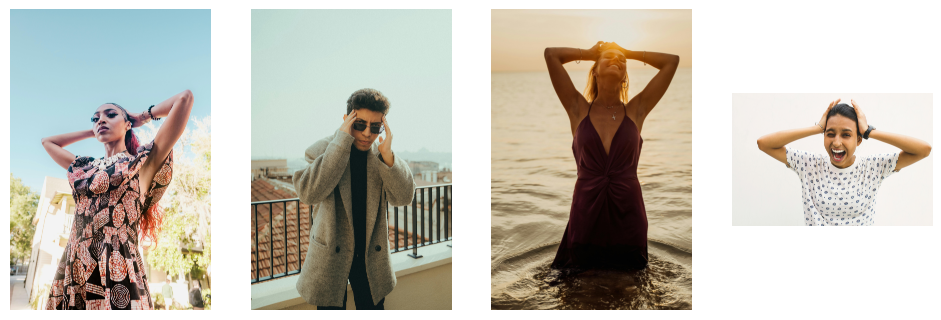


--------------------------------------------------

Folder: hands_on_hips
  Number of images: 41
  Total size: 60.24 MB
Sample images from 'hands_on_hips':


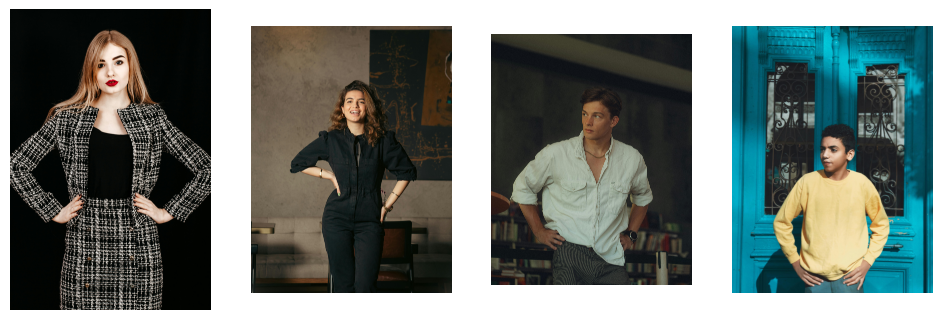


--------------------------------------------------

Folder: hands_out
  Number of images: 10
  Total size: 20.23 MB
Sample images from 'hands_out':


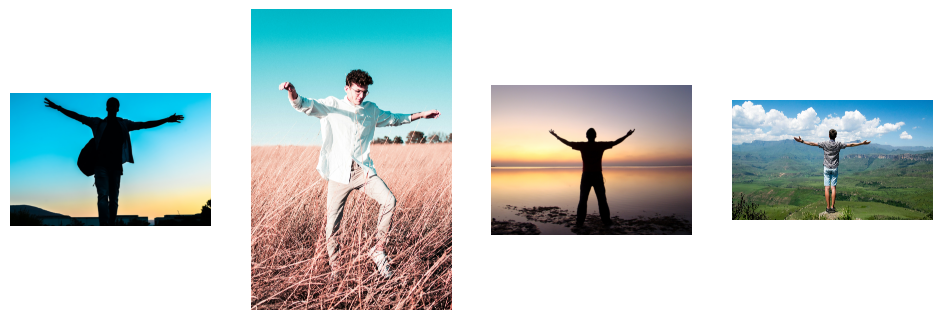


--------------------------------------------------

Folder: hands_up
  Number of images: 19
  Total size: 25.30 MB
Sample images from 'hands_up':


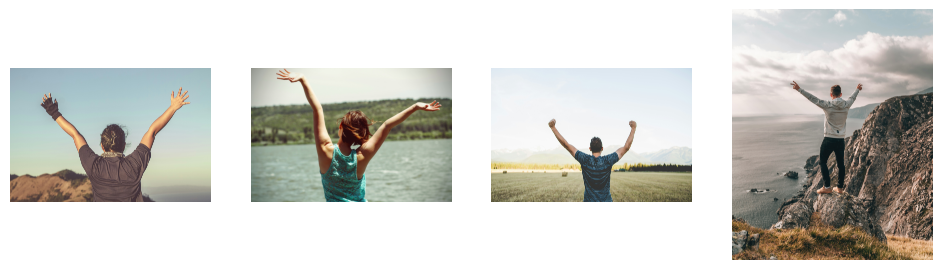


--------------------------------------------------



In [17]:
# Step 3: Call the function to analyze the dataset
analyze_dataset()

In [18]:
# Helper function to create a summary report for the entire dataset and each category
def create_summary_report():
    total_files = 0  # Total number of images across all categories
    total_dataset_size = 0  # Total size of the dataset in bytes

    summary = {}

    # Iterating through each folder (category) and collect information
    for pose_category in pose_categories:
        num_files, total_size = get_folder_details(pose_category)

        total_files += num_files  # Accumulate total number of files
        total_dataset_size += total_size  # Accumulate total dataset size

        total_size_mb = total_size / (1024 * 1024)  # Convert to MB
        summary[pose_category] = {
            'Number of images': num_files,
            'Total size (MB)': total_size_mb
        }

    # Printing a holistic summary (total dataset information)
    total_dataset_size_mb = total_dataset_size / (1024 * 1024)  # Convert to MB
    print("\n--- Holistic Dataset Summary ---")
    print(f"Total number of images in the dataset: {total_files}")
    print(f"Total dataset size: {total_dataset_size_mb:.2f} MB\n")

    # Printing category-specific summaries
    print("--- Category-wise Summary Report ---")
    print(f"{'Category':<20}{'Number of Images':<20}{'Total Size (MB)':<20}")
    print("-" * 60)
    for category, details in summary.items():
        print(f"{category:<20}{details['Number of images']:<20}{details['Total size (MB)']:<20.2f}")

In [19]:
# Step 4: Call the function to generate a summary report of the dataset
create_summary_report()


--- Holistic Dataset Summary ---
Total number of images in the dataset: 199
Total dataset size: 301.22 MB

--- Category-wise Summary Report ---
Category            Number of Images    Total Size (MB)     
------------------------------------------------------------
arms_crossed        38                  56.35               
hand_on_hip         22                  33.37               
hand_out            14                  21.51               
hands_down          29                  44.13               
hands_on_head       26                  40.07               
hands_on_hips       41                  60.24               
hands_out           10                  20.23               
hands_up            19                  25.30               


## Homework 2: Model development (the very first steps)

Below are the requirements for running a pretrained model from Homework 2:
```md
Option C: Pretrained Model
Load a Pretrained Model:
- Select and Load Model: Choose a pretrained model (e.g., ResNet for images, BERT for text) and load it directly from a library like torchvision for image models or transformers for NLP models.

Feature Extraction or Basic Fine-Tuning:
- Feature Extraction: Pass a small batch of data through the model to extract features from one of its layers. Print out the extracted features to verify.
- Fine-Tuning (Optional): Unfreeze one layer if you want to try a simple fine-tuning. Add a custom output layer if applicable for your task.

Quick Test:
- Use the model to make predictions on a few samples (e.g., text or image) and display the results.
- Print the output or class labels to verify the model’s functionality.
```

The code below is adapted from example notebooks authored by Google/TensorFlow:
- https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/pose_classification.ipynb
- https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/hub/tutorials/movenet.ipynb#scrollTo=5I3xBq80E3N_

### Importing necessary modules (setup)

In [38]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [39]:
# Import essential utility libraries
import csv
import cv2
import itertools
import numpy as np
import pandas as pd
import os
import sys
import tempfile
import tqdm

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

# Import TensorFlow and keras libraries
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
from tensorflow import keras

# Import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
#@title Helper functions for visualization

# Dictionary that maps from joint names to keypoint indices.
KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

# Maps bones to a matplotlib color name.
KEYPOINT_EDGE_INDS_TO_COLOR = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def _keypoints_and_edges_for_display(keypoints_with_scores,
                                     height,
                                     width,
                                     keypoint_threshold=0.11):
  """Returns high confidence keypoints and edges for visualization.

  Args:
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    height: height of the image in pixels.
    width: width of the image in pixels.
    keypoint_threshold: minimum confidence score for a keypoint to be
      visualized.

  Returns:
    A (keypoints_xy, edges_xy, edge_colors) containing:
      * the coordinates of all keypoints of all detected entities;
      * the coordinates of all skeleton edges of all detected entities;
      * the colors in which the edges should be plotted.
  """
  keypoints_all = []
  keypoint_edges_all = []
  edge_colors = []
  num_instances, _, _, _ = keypoints_with_scores.shape
  for idx in range(num_instances):
    kpts_x = keypoints_with_scores[0, idx, :, 1]
    kpts_y = keypoints_with_scores[0, idx, :, 0]
    kpts_scores = keypoints_with_scores[0, idx, :, 2]
    kpts_absolute_xy = np.stack(
        [width * np.array(kpts_x), height * np.array(kpts_y)], axis=-1)
    kpts_above_thresh_absolute = kpts_absolute_xy[
        kpts_scores > keypoint_threshold, :]
    keypoints_all.append(kpts_above_thresh_absolute)

    for edge_pair, color in KEYPOINT_EDGE_INDS_TO_COLOR.items():
      if (kpts_scores[edge_pair[0]] > keypoint_threshold and
          kpts_scores[edge_pair[1]] > keypoint_threshold):
        x_start = kpts_absolute_xy[edge_pair[0], 0]
        y_start = kpts_absolute_xy[edge_pair[0], 1]
        x_end = kpts_absolute_xy[edge_pair[1], 0]
        y_end = kpts_absolute_xy[edge_pair[1], 1]
        line_seg = np.array([[x_start, y_start], [x_end, y_end]])
        keypoint_edges_all.append(line_seg)
        edge_colors.append(color)
  if keypoints_all:
    keypoints_xy = np.concatenate(keypoints_all, axis=0)
  else:
    keypoints_xy = np.zeros((0, 17, 2))

  if keypoint_edges_all:
    edges_xy = np.stack(keypoint_edges_all, axis=0)
  else:
    edges_xy = np.zeros((0, 2, 2))
  return keypoints_xy, edges_xy, edge_colors


def draw_prediction_on_image(
    image, keypoints_with_scores, crop_region=None, close_figure=False,
    output_image_height=None):
  """Draws the keypoint predictions on image.

  Args:
    image: A numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    crop_region: A dictionary that defines the coordinates of the bounding box
      of the crop region in normalized coordinates (see the init_crop_region
      function below for more detail). If provided, this function will also
      draw the bounding box on the image.
    output_image_height: An integer indicating the height of the output image.
      Note that the image aspect ratio will be the same as the input image.

  Returns:
    A numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  # To remove the huge white borders
  fig.tight_layout(pad=0)
  ax.margins(0)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.axis('off')

  im = ax.imshow(image)
  line_segments = LineCollection([], linewidths=(4), linestyle='solid')
  ax.add_collection(line_segments)
  # Turn off tick labels
  scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

  (keypoint_locs, keypoint_edges,
   edge_colors) = _keypoints_and_edges_for_display(
       keypoints_with_scores, height, width)

  line_segments.set_segments(keypoint_edges)
  line_segments.set_color(edge_colors)
  if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
  if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

  if crop_region is not None:
    xmin = max(crop_region['x_min'] * width, 0.0)
    ymin = max(crop_region['y_min'] * height, 0.0)
    rec_width = min(crop_region['x_max'], 0.99) * width - xmin
    rec_height = min(crop_region['y_max'], 0.99) * height - ymin
    rect = patches.Rectangle(
        (xmin,ymin),rec_width,rec_height,
        linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)

  fig.canvas.draw()
  image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  image_from_plot = image_from_plot.reshape(
      fig.canvas.get_width_height()[::-1] + (3,))
  plt.close(fig)
  if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(
        image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
  return image_from_plot

def to_gif(images, duration):
  """Converts image sequence (4D numpy array) to gif."""
  imageio.mimsave('./animation.gif', images, duration=duration)
  return embed.embed_file('./animation.gif')

def progress(value, max=100):
  return HTML("""
      <progress
          value='{value}'
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """.format(value=value, max=max))

### Loading the pre-trained model (MoveNet Thunder)

In [76]:
model_name = "movenet_thunder" #@param ["movenet_lightning", "movenet_thunder", "movenet_lightning_f16.tflite", "movenet_thunder_f16.tflite", "movenet_lightning_int8.tflite", "movenet_thunder_int8.tflite"]

if "tflite" in model_name:
  if "movenet_lightning_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/float16/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
    input_size = 256
  elif "movenet_lightning_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/int8/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/int8/4?lite-format=tflite
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_path="model.tflite")
  interpreter.allocate_tensors()

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    # TF Lite format expects tensor type of uint8.
    input_image = tf.cast(input_image, dtype=tf.uint8)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
    # Invoke inference.
    interpreter.invoke()
    # Get the model prediction.
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    return keypoints_with_scores

else:
  if "movenet_lightning" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
    input_size = 192
  elif "movenet_thunder" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [height, width, 3] tensor representing the input image
        pixels. The input will be resized to match the expected input resolution
        of the model (256x256 for MoveNet Thunder or 192x192 for MoveNet Lightning).

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    # Step 1: Resize the input image to 256x256 (or 192x192 for Lightning)
    input_image = tf.image.resize_with_pad(input_image, target_height=input_size, target_width=input_size)

    # Step 2: Add a batch dimension (the model expects [1, 256, 256, 3])
    input_image = tf.expand_dims(input_image, axis=0)

    # Step 3: Cast the image to int32 (required for MoveNet)
    input_image = tf.cast(input_image, dtype=tf.int32)

    # Step 4: Run the model and get the output
    model = module.signatures['serving_default']
    outputs = model(input_image)

    # Step 5: Extract the keypoints from the output tensor
    keypoints_with_scores = outputs['output_0'].numpy()

    return keypoints_with_scores

#### Single image example

In [43]:
# Download the image
!curl -o input_image.jpeg https://images.pexels.com/photos/4384679/pexels-photo-4384679.jpeg --silent

In [44]:
# Load the input image.
image_path = 'input_image.jpeg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)

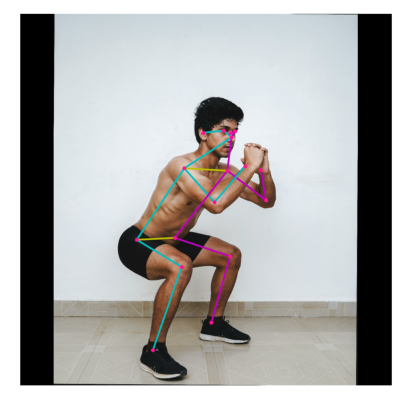

In [45]:
# Resize and pad the image to keep the aspect ratio and fit the expected size.
input_image = tf.expand_dims(image, axis=0)
input_image = tf.image.resize_with_pad(input_image, input_size, input_size)

# Run model inference.
keypoints_with_scores = movenet(input_image)

# Visualize the predictions with image.
display_image = tf.expand_dims(image, axis=0)
display_image = tf.cast(tf.image.resize_with_pad(
    display_image, 1280, 1280), dtype=tf.int32)
output_overlay = draw_prediction_on_image(
    np.squeeze(display_image.numpy(), axis=0), keypoints_with_scores)

plt.figure(figsize=(5, 5))
plt.imshow(output_overlay)
_ = plt.axis('off')

### Preprocessing input

In [64]:
is_skip_step_1 = False #@param ["False", "True"] {type:"raw"}

In [65]:
use_custom_dataset = True #@param ["False", "True"] {type:"raw"}

dataset_is_split = False #@param ["False", "True"] {type:"raw"}

At this point, the example script necessitates a .zip file with the entire dataset. The following code downloads the dataset into the Colab local directory and compresses it into a .zip file.

In [62]:
# Creating a local directory to store the files
local_dir = '/content/gcs_bucket_files'  # Colab's local directory
os.makedirs(local_dir, exist_ok=True)

# Downloading all files from the GCS bucket to the local directory
def download_gcs_bucket(bucket, local_dir):
    blobs = bucket.list_blobs()

    for blob in blobs:
        if not blob.name.endswith('/'):  # Skip directories
            local_file_path = os.path.join(local_dir, blob.name)
            os.makedirs(os.path.dirname(local_file_path), exist_ok=True)
            blob.download_to_filename(local_file_path)
            print(f"Downloaded: {blob.name}")

Downloaded: arms_crossed/pexels-alex-green-5699868.jpg
Downloaded: arms_crossed/pexels-aliakbar-nosrati-453685724-15817483.jpg
Downloaded: arms_crossed/pexels-anna-nekrashevich-7550887.jpg
Downloaded: arms_crossed/pexels-ashford-marx-1565533-27498966.jpg
Downloaded: arms_crossed/pexels-cristian-rojas-8460157.jpg
Downloaded: arms_crossed/pexels-emmages-8005401.jpg
Downloaded: arms_crossed/pexels-fabio-delgado-valverde-1662051559-27919192.jpg
Downloaded: arms_crossed/pexels-fashioninfluencer-model-1108930441-20755887.jpg
Downloaded: arms_crossed/pexels-gabby-k-6311269.jpg
Downloaded: arms_crossed/pexels-gabby-k-7114755.jpg
Downloaded: arms_crossed/pexels-italo-melo-881954-2379004.jpg
Downloaded: arms_crossed/pexels-jeffreyreed-769745.jpg
Downloaded: arms_crossed/pexels-kampus-5920774.jpg
Downloaded: arms_crossed/pexels-karolina-grabowska-5207087.jpg
Downloaded: arms_crossed/pexels-karolina-grabowska-7876506.jpg
Downloaded: arms_crossed/pexels-karolina-grabowska-8528605.jpg
Downloaded: ar

NameError: name 'zipfile' is not defined

In [63]:
import zipfile

# Compressing the downloaded files into a .zip archive
zip_filename = '/content/gcs_bucket.zip'

def zip_directory(dir_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(dir_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, dir_path))

zip_directory(local_dir, zip_filename)
print(f"Bucket compressed into: {zip_filename}")

Bucket compressed into: /content/gcs_bucket.zip


In [67]:
import os
import random
import shutil

def split_into_train_test(images_origin, images_dest, test_split):
  """Splits a directory of sorted images into training and test sets.

  Args:
    images_origin: Path to the directory with your images. This directory
      must include subdirectories for each of your labeled classes. For example:
      yoga_poses/
      |__ downdog/
          |______ 00000128.jpg
          |______ 00000181.jpg
          |______ ...
      |__ goddess/
          |______ 00000243.jpg
          |______ 00000306.jpg
          |______ ...
      ...
    images_dest: Path to a directory where you want the split dataset to be
      saved. The results looks like this:
      split_yoga_poses/
      |__ train/
          |__ downdog/
              |______ 00000128.jpg
              |______ ...
      |__ test/
          |__ downdog/
              |______ 00000181.jpg
              |______ ...
    test_split: Fraction of data to reserve for test (float between 0 and 1).
  """
  _, dirs, _ = next(os.walk(images_origin))

  TRAIN_DIR = os.path.join(images_dest, 'train')
  TEST_DIR = os.path.join(images_dest, 'test')
  os.makedirs(TRAIN_DIR, exist_ok=True)
  os.makedirs(TEST_DIR, exist_ok=True)

  for dir in dirs:
    # Get all filenames for this dir, filtered by filetype
    filenames = os.listdir(os.path.join(images_origin, dir))
    filenames = [os.path.join(images_origin, dir, f) for f in filenames if (
        f.endswith('.png') or f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.bmp'))]
    # Shuffle the files, deterministically
    filenames.sort()
    random.seed(42)
    random.shuffle(filenames)
    # Divide them into train/test dirs
    os.makedirs(os.path.join(TEST_DIR, dir), exist_ok=True)
    os.makedirs(os.path.join(TRAIN_DIR, dir), exist_ok=True)
    test_count = int(len(filenames) * test_split)
    for i, file in enumerate(filenames):
      if i < test_count:
        destination = os.path.join(TEST_DIR, dir, os.path.split(file)[1])
      else:
        destination = os.path.join(TRAIN_DIR, dir, os.path.split(file)[1])
      shutil.copyfile(file, destination)
    print(f'Moved {test_count} of {len(filenames)} from class "{dir}" into test.')
  print(f'Your split dataset is in "{images_dest}"')


if use_custom_dataset:
  # ATTENTION:
  # You must edit these two lines to match your archive and images folder name:
  # !tar -xf YOUR_DATASET_ARCHIVE_NAME.tar
  # !unzip -q gcs_bucket.zip
  dataset_in = 'gcs_bucket_files'

  # You can leave the rest alone:
  if not os.path.isdir(dataset_in):
    raise Exception("dataset_in is not a valid directory")
  if dataset_is_split:
    IMAGES_ROOT = dataset_in
  else:
    dataset_out = 'split_' + dataset_in
    split_into_train_test(dataset_in, dataset_out, test_split=0.2)
    IMAGES_ROOT = dataset_out



Moved 3 of 19 from class "hands_up" into test.
Moved 5 of 26 from class "hands_on_head" into test.
Moved 2 of 14 from class "hand_out" into test.
Moved 4 of 22 from class "hand_on_hip" into test.
Moved 2 of 10 from class "hands_out" into test.
Moved 8 of 41 from class "hands_on_hips" into test.
Moved 7 of 38 from class "arms_crossed" into test.
Moved 5 of 29 from class "hands_down" into test.
Your split dataset is in "split_gcs_bucket_files"


At this point, the dataset is split into "train" and "test" inside of the folder `split_gcs_bucket_files`.

In [80]:
#@title Code to load the images, detect pose landmarks and save them into a CSV file

from data import BodyPart
from data import Person

class MoveNetPreprocessor(object):
  """Helper class to preprocess pose sample images for classification."""

  def __init__(self,
                images_in_folder,
                images_out_folder,
                csvs_out_path,
                movenet_function):
      """Creates a preprocessor to detect pose from images and save as CSV.

      Args:
        images_in_folder: Path to the folder with the input images.
        images_out_folder: Path to write the images overlay with detected
          landmarks.
        csvs_out_path: Path to write the CSV containing the detected landmark
          coordinates.
        movenet_function: The `movenet` function to detect pose, which will
          be passed based on your model loading method.
      """
      self._images_in_folder = images_in_folder
      self._images_out_folder = images_out_folder
      self._csvs_out_path = csvs_out_path
      self._movenet_function = movenet_function  # Store the movenet function
      self._messages = []

      # Create a temp dir to store the pose CSVs per class
      self._csvs_out_folder_per_class = tempfile.mkdtemp()

      # Get list of pose classes and print image statistics
      self._pose_class_names = sorted(
          [n for n in os.listdir(self._images_in_folder) if not n.startswith('.')]
      )

  def detect(self, input_tensor):
      """Runs detection on an input image using the provided MoveNet function.

      Args:
        input_tensor: A [1, height, width, 3] Tensor of type tf.float32 or tf.uint8,
          depending on whether using TFLite or TensorFlow Hub.

      Returns:
        A Person entity detected by the MoveNet model, or None if no person is detected.
      """
      keypoints_with_scores = self._movenet_function(input_tensor)

      # Process the keypoints_with_scores to create a Person object (optional)
      # Depending on your structure, you can wrap it into a "Person" object or
      # use it directly in your CSV saving process.
      person = self._convert_to_person(keypoints_with_scores)
      return person

  def _convert_to_person(self, keypoints_with_scores):
      """Converts keypoints with scores into a Person object."""

      # Assuming your model returns [1, 1, 17, 3] as keypoints_with_scores
      keypoints = keypoints_with_scores[0, 0, :, :2]  # Extract (x, y) coordinates

      # Create a list of BodyPart instances, using only index and (x, y) coordinates
      keypoints_list = [
          BodyPart(index, coordinate[0], coordinate[1])  # Pass index and coordinates only
          for index, coordinate in enumerate(keypoints)
      ]

      # Return the list of keypoints (or wrap it into a Person object if needed)
      return Person(keypoints_list)

  def process(self, per_pose_class_limit=None, detection_threshold=0.1):
    """Preprocesses images in the given folder.
    Args:
      per_pose_class_limit: Number of images to load. As preprocessing usually
        takes time, this parameter can be specified to make the reduce of the
        dataset for testing.
      detection_threshold: Only keep images with all landmark confidence score
        above this threshold.
    """
    # Loop through the classes and preprocess its images
    for pose_class_name in self._pose_class_names:
      print('Preprocessing', pose_class_name, file=sys.stderr)

      # Paths for the pose class.
      images_in_folder = os.path.join(self._images_in_folder, pose_class_name)
      images_out_folder = os.path.join(self._images_out_folder, pose_class_name)
      csv_out_path = os.path.join(self._csvs_out_folder_per_class,
                                  pose_class_name + '.csv')
      if not os.path.exists(images_out_folder):
        os.makedirs(images_out_folder)

      # Detect landmarks in each image and write it to a CSV file
      with open(csv_out_path, 'w') as csv_out_file:
        csv_out_writer = csv.writer(csv_out_file,
                                    delimiter=',',
                                    quoting=csv.QUOTE_MINIMAL)
        # Get list of images
        image_names = sorted(
            [n for n in os.listdir(images_in_folder) if not n.startswith('.')])
        if per_pose_class_limit is not None:
          image_names = image_names[:per_pose_class_limit]

        valid_image_count = 0

        # Detect pose landmarks from each image
        for image_name in tqdm.tqdm(image_names):
          image_path = os.path.join(images_in_folder, image_name)

          try:
            image = tf.io.read_file(image_path)
            image = tf.io.decode_jpeg(image)
          except:
            self._messages.append('Skipped ' + image_path + '. Invalid image.')
            continue
          else:
            image = tf.io.read_file(image_path)
            image = tf.io.decode_jpeg(image)
            image_height, image_width, channel = image.shape

          # Skip images that isn't RGB because Movenet requires RGB images
          if channel != 3:
            self._messages.append('Skipped ' + image_path +
                                  '. Image isn\'t in RGB format.')
            continue
          person = self.detect(image)

          # Save landmarks if all landmarks were detected
          min_landmark_score = min(
              [keypoint.score for keypoint in person.keypoints])
          should_keep_image = min_landmark_score >= detection_threshold
          if not should_keep_image:
            self._messages.append('Skipped ' + image_path +
                                  '. No pose was confidentlly detected.')
            continue

          valid_image_count += 1

          # Draw the prediction result on top of the image for debugging later
          output_overlay = draw_prediction_on_image(
              image.numpy().astype(np.uint8), person,
              close_figure=True, keep_input_size=True)

          # Write detection result into an image file
          output_frame = cv2.cvtColor(output_overlay, cv2.COLOR_RGB2BGR)
          cv2.imwrite(os.path.join(images_out_folder, image_name), output_frame)

          # Get landmarks and scale it to the same size as the input image
          pose_landmarks = np.array(
              [[keypoint.coordinate.x, keypoint.coordinate.y, keypoint.score]
                for keypoint in person.keypoints],
              dtype=np.float32)

          # Write the landmark coordinates to its per-class CSV file
          coordinates = pose_landmarks.flatten().astype(np.str).tolist()
          csv_out_writer.writerow([image_name] + coordinates)

        if not valid_image_count:
          raise RuntimeError(
              'No valid images found for the "{}" class.'
              .format(pose_class_name))

    # Print the error message collected during preprocessing.
    print('\n'.join(self._messages))

    # Combine all per-class CSVs into a single output file
    all_landmarks_df = self._all_landmarks_as_dataframe()
    all_landmarks_df.to_csv(self._csvs_out_path, index=False)

  def class_names(self):
    """List of classes found in the training dataset."""
    return self._pose_class_names

  def _all_landmarks_as_dataframe(self):
    """Merge all per-class CSVs into a single dataframe."""
    total_df = None
    for class_index, class_name in enumerate(self._pose_class_names):
      csv_out_path = os.path.join(self._csvs_out_folder_per_class,
                                  class_name + '.csv')
      per_class_df = pd.read_csv(csv_out_path, header=None)

      # Add the labels
      per_class_df['class_no'] = [class_index]*len(per_class_df)
      per_class_df['class_name'] = [class_name]*len(per_class_df)

      # Append the folder name to the filename column (first column)
      per_class_df[per_class_df.columns[0]] = (os.path.join(class_name, '')
        + per_class_df[per_class_df.columns[0]].astype(str))

      if total_df is None:
        # For the first class, assign its data to the total dataframe
        total_df = per_class_df
      else:
        # Concatenate each class's data into the total dataframe
        total_df = pd.concat([total_df, per_class_df], axis=0)

    list_name = [[bodypart.name + '_x', bodypart.name + '_y',
                  bodypart.name + '_score'] for bodypart in BodyPart]
    header_name = []
    for columns_name in list_name:
      header_name += columns_name
    header_name = ['file_name'] + header_name
    header_map = {total_df.columns[i]: header_name[i]
                  for i in range(len(header_name))}

    total_df.rename(header_map, axis=1, inplace=True)

    return total_df

In [81]:
if not is_skip_step_1:
  images_in_train_folder = os.path.join(IMAGES_ROOT, 'train')
  images_out_train_folder = 'poses_images_out_train'
  csvs_out_train_path = 'train_data.csv'

  # Initialize the preprocessor with the TensorFlow Hub `movenet` function
  preprocessor = MoveNetPreprocessor(
      images_in_folder=images_in_train_folder,
      images_out_folder=images_out_train_folder,
      csvs_out_path=csvs_out_train_path,
      movenet_function=movenet
  )

  preprocessor.process(per_pose_class_limit=None)

Preprocessing arms_crossed
  0%|          | 0/31 [00:00<?, ?it/s]


TypeError: EnumMeta.__call__() takes from 2 to 3 positional arguments but 4 were given